# EDA imputed trainingset and PCA 

## library imports

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

import os 
import sys 


sys.path.append(os.path.relpath('./experiments/shared_functions/'))
import bwi_dataset_training_funtions as sf

## load data and split into features, targets, grouping 

In [2]:
data = pd.read_csv('../datasets/ml_bwi_v3_train_imputed.csv', index_col=0)

# federal states Germany 
regions = gpd.read_file('../datasets/de.json')

county_dict = {
    "Schleswig-Holstein": 1,
    "Hamburg": 2,
    "Niedersachsen": 3,
    "Bremen": 4,
    "Nordrhein-Westfalen": 5,
    "Hessen": 6,
    "Rheinland-Pfalz": 7,
    "Baden-Württemberg": 8,
    "Bayern": 9,
    "Saarland": 10,
    "Berlin": 11,
    "Brandenburg": 12,
    "Mecklenburg-Vorpommern": 13,
    "Sachsen": 14,
    "Sachsen-Anhalt": 15,
    "Thüringen": 16
}

regions['name'] = regions['name'].replace(county_dict)

C:\Users\davha\AppData\Local\Temp\ipykernel_16600\3396251831.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  regions['name'] = regions['name'].replace(county_dict)


In [3]:
groups, features, target = sf.split_input_data(data)

## base information dataset

In [6]:
features.info() # 35 numerical and # 12 categorical features

<class 'pandas.core.frame.DataFrame'>
Index: 137885 entries, 0 to 137884
Data columns (total 47 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Al_ba          137885 non-null  float64
 1   Bhd            137885 non-null  float64
 2   Hoehe          137885 non-null  float64
 3   D7             137885 non-null  float64
 4   D03            137885 non-null  float64
 5   G              137885 non-null  float64
 6   VolR           137885 non-null  float64
 7   N_ha           137885 non-null  float64
 8   Stf            137885 non-null  float64
 9   Biom_o         137885 non-null  float64
 10  Biov_o         137885 non-null  float64
 11  Gexp           137885 non-null  float64
 12  Gneig          137885 non-null  float64
 13  HoeheNN        137885 non-null  float64
 14  TOT            137885 non-null  float64
 15  nfk_30         137885 non-null  float64
 16  bio_1          137885 non-null  float64
 17  bio_2          137885 non-null  fl

### Target distributions 

In [7]:
# color palette species
color_palette_species = sns.color_palette("colorblind", 9)

C:\Users\davha\AppData\Local\Temp\ipykernel_16900\3959734889.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=species_ratios.values, x=species_ratios.index, palette=color_palette_species, orient='v')


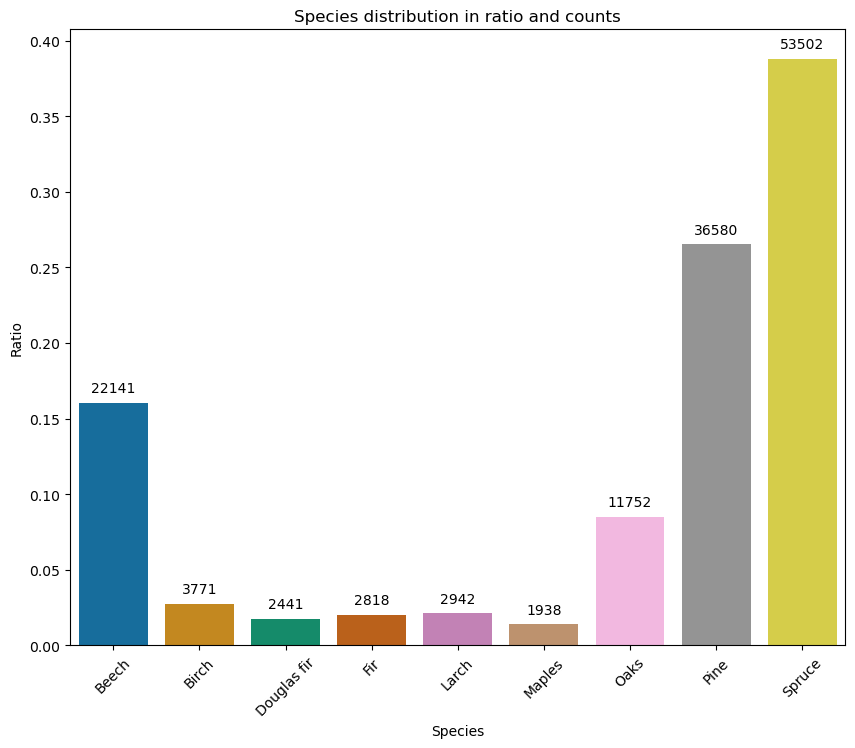

In [8]:
species_counts = data['Ba'].value_counts()
species_counts = species_counts.sort_index()
species_ratios = species_counts / species_counts.sum()

plt.figure(figsize=(10, 8))
ax = sns.barplot(y=species_ratios.values, x=species_ratios.index, palette=color_palette_species, orient='v')

# Add counts on top of each bar
for i, count in enumerate(species_counts):
    ax.text(i, species_ratios.values[i] + 0.005, count, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Species distribution in ratio and counts')
plt.xlabel('Species')
plt.ylabel('Ratio')
plt.show()

### Target distribution per federal state

In [9]:
grouped_df = data.groupby('bl')['Ba'].value_counts().unstack().fillna(0)

grouped_df['sum_trees'] = grouped_df.sum(axis=1)

for col in data['Ba'].unique():
    grouped_df[(col+'_perc')] = (grouped_df[col] / grouped_df['sum_trees']).round(2)


regions = regions.join(grouped_df, on='name')

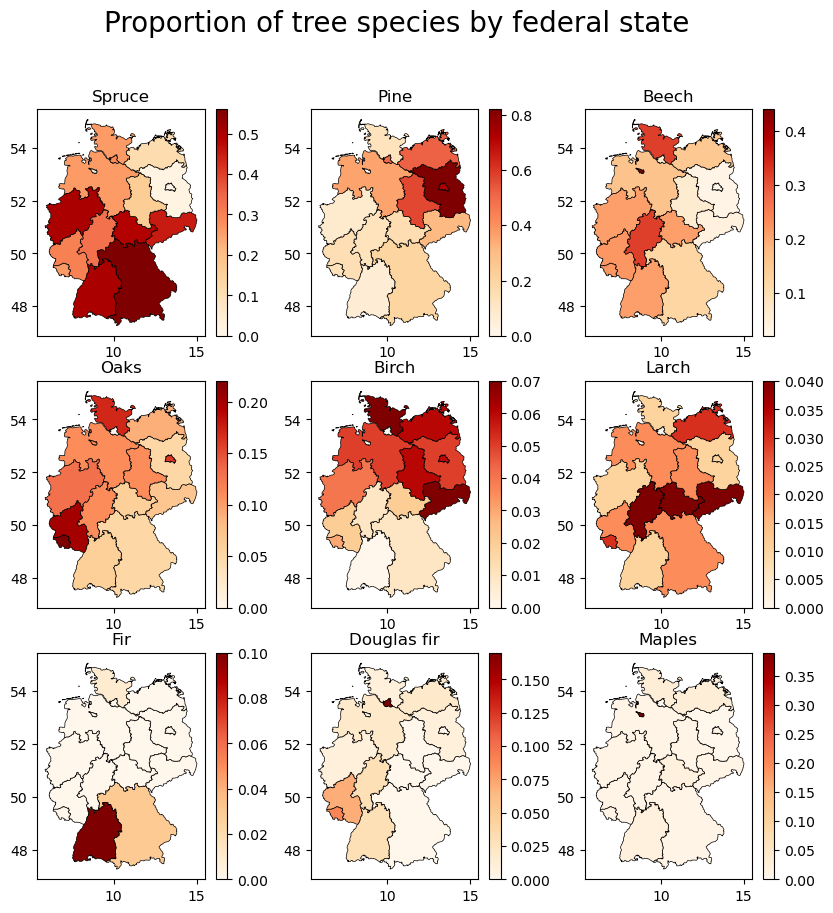

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10)) # Create a 3x3 grid of subplots
fig.suptitle('Proportion of tree species by federal state', fontsize=20)

ba_sorted_asc = data['Ba'].value_counts().sort_values(ascending=False).index
for i, col_name in enumerate(ba_sorted_asc):
    ax = regions.plot(column=(col_name+'_perc'), cmap='OrRd', legend=True, edgecolor='black', linewidth=0.5, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col_name)
    
plt.show()

## EDA numerical features

In [16]:
features.describe()

,Al_ba,Bhd,Hoehe,D7,D03,G,VolR,N_ha,Stf,Biom_o,...,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
count,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,...,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000,137885.000000
mean,75.944214,328.352946,234.387968,256.230641,257.575799,0.102587,1.317912,103.334823,28.710408,713.918014,...,16.597333,0.649210,903.271161,107.905153,51.355942,0.221651,283.270254,178.407492,262.898249,214.967437
std,37.986017,151.003640,72.213718,129.154300,117.015956,0.098248,1.611668,140.503214,29.274920,941.278991,...,1.257123,1.176832,323.275428,42.569664,17.951117,0.061082,109.551297,63.604197,101.731533,89.255286
min,6.000000,68.000000,20.000000,0.000000,39.000000,0.003632,0.000000,0.000000,0.000000,8.113195,...,10.520000,-4.020000,471.000000,51.000000,25.000000,0.090000,144.000000,89.000000,140.000000,89.000000
25%,45.000000,218.000000,184.000000,163.000000,172.000000,0.037325,0.326510,30.594955,11.022379,165.839874,...,15.880000,-0.110000,690.000000,80.000000,39.000000,0.180000,211.000000,134.000000,200.000000,150.000000
50%,70.000000,311.000000,235.000000,244.000000,244.000000,0.075964,0.821342,54.037262,20.973473,415.478180,...,16.790000,0.790000,824.000000,98.000000,47.000000,0.210000,256.000000,162.000000,237.000000,190.000000
75%,100.000000,416.000000,286.000000,334.000000,324.000000,0.135918,1.718819,109.159760,36.394104,888.207947,...,17.470000,1.450000,1014.000000,121.000000,58.000000,0.260000,318.000000,203.000000,287.000000,253.000000
max,515.000000,1820.000000,525.000000,1424.000000,1511.000000,2.601553,48.329384,1900.474487,1028.723389,21244.080078,...,19.880000,3.930000,3303.000000,396.000000,205.000000,0.490000,1043.000000,716.000000,1043.000000,716.000000


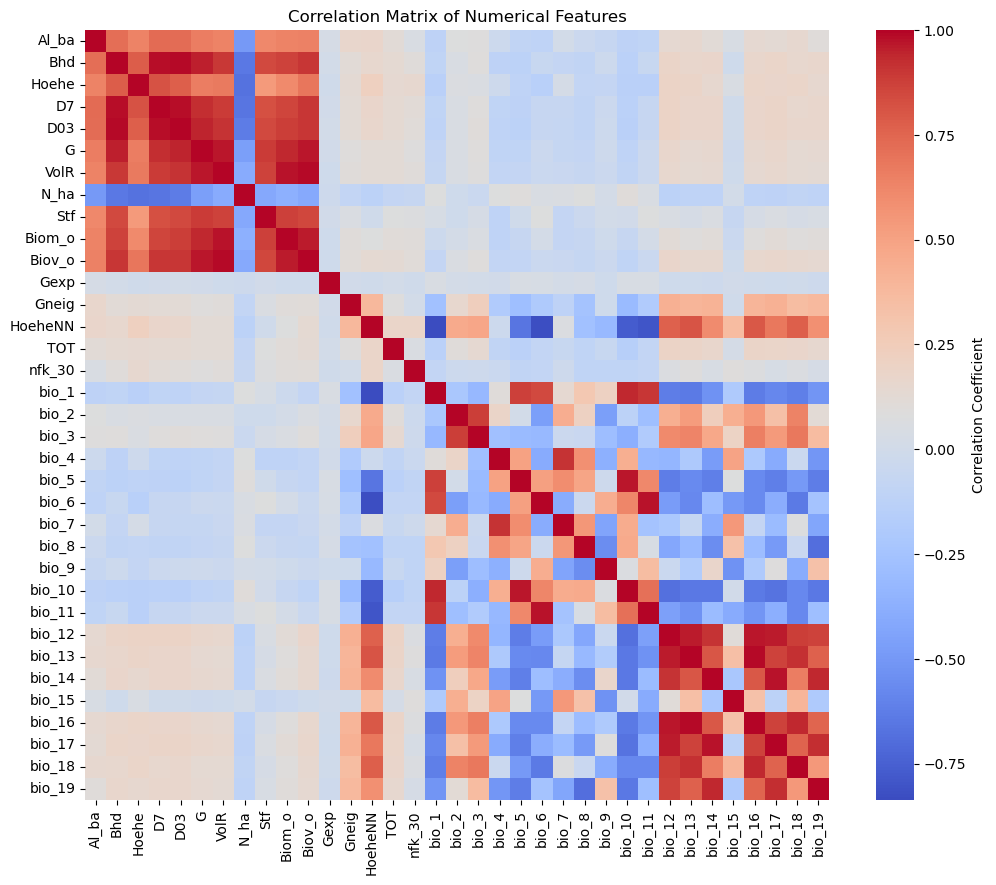

In [12]:
num_features = features.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = num_features.corr()

# plot
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()


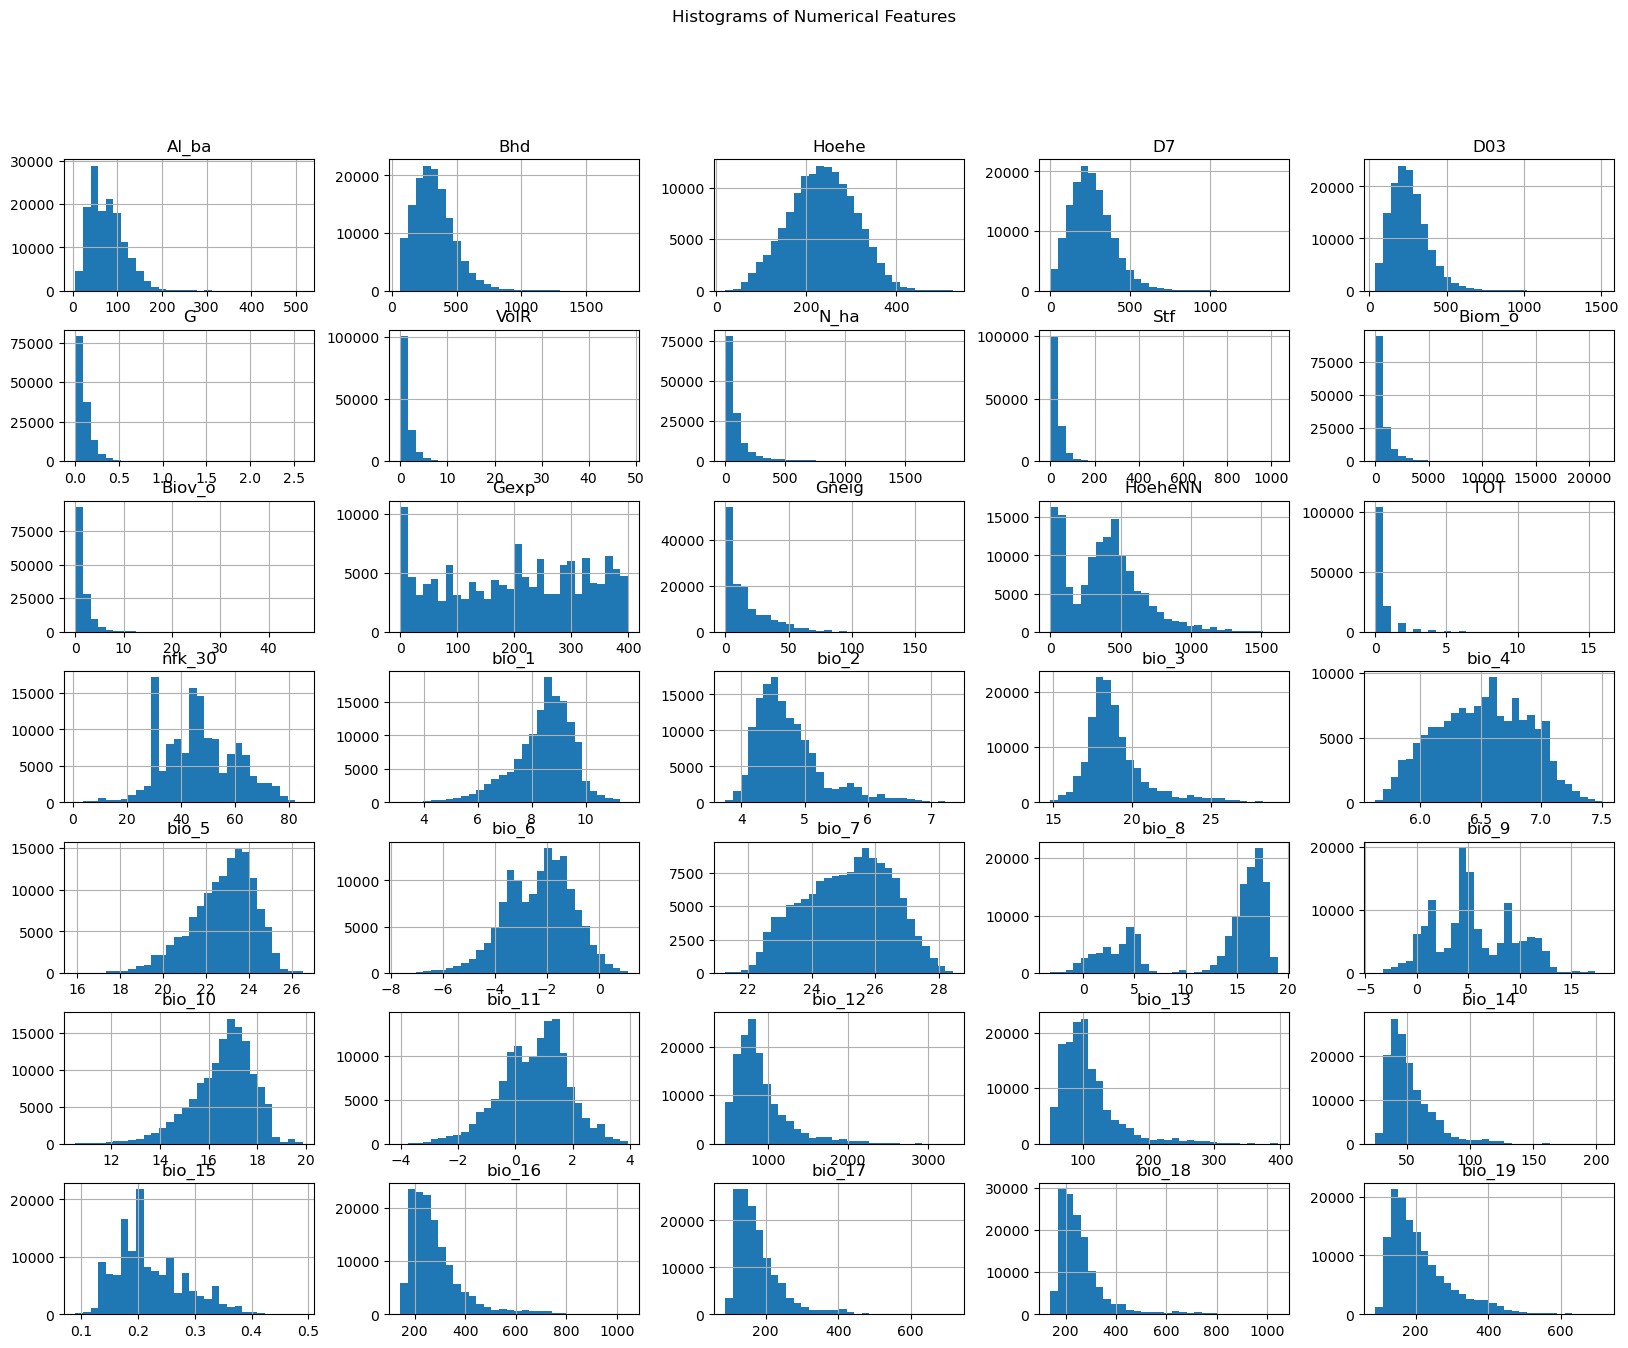

In [13]:
num_features.hist(bins=30, figsize=(20, 15), layout=(7, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## EDA categorical features

In [78]:
cat_desc = features.select_dtypes(include=['object']).describe()

In [81]:
cat_desc

,Bs,Gform,natHoe,Be,NatNaeheHaupt,Situation,Bkl,Ast,BestockAb,BODTYP,NAEHR,WASSER
count,137885,137885,137885,137885,137885,137885,137885,137885,137885,137885,137885,137885
unique,4,10,5,4,5,7,4,4,6,17,6,3
top,main stand,plain,submontane,even-aged high forest,conditional seminaturel,none,dominant tree,no pruning,single storied,B,mesotrophic,T
freq,131721,40967,50760,136913,52560,132467,84073,134388,64392,86997,39347,109139


In [80]:
cat_desc.to_clipboard()

In [ ]:
cat_features = features.select_dtypes(include=['object']).columns

cat_metrics = []
for cat in cat_features:
    unique_counts = features[cat].value_counts().values
    normalized_counts = (unique_counts/features.shape[0]).round(3)
    cat_metrics.append((unique_counts.shape[0], unique_counts, normalized_counts))

In [72]:
df_cat_metrics = pd.DataFrame(cat_metrics, columns=['Unique Values', 'Counts', 'Normalized Counts'], index=cat_features)

## PCA

In [4]:
from sklearn.decomposition import PCA 
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cat_selector = selector(dtype_include=object)
num_selector = selector(dtype_include=np.number)

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

feature_transformer = ColumnTransformer(
    [
        ('cat', cat_transformer, cat_selector),
        ('num', num_transformer, num_selector)
    ]
)

pca = PCA(n_components=0.95)

In [5]:
pca_pipe = Pipeline(
    [
    ('preprocess', feature_transformer),
    ('pca', pca)
    ]
)

In [6]:
pca_decom = pca_pipe.fit_transform(features)
df_pca_features = pd.DataFrame(pca_decom, columns=[f'PC{i+1}' for i in range(pca_decom.shape[1])])

In [7]:
feature_names = pca_pipe['preprocess'].get_feature_names_out()
feature_names = np.array([name.split('__')[1] for name in feature_names])


In [8]:
components = pca_pipe.named_steps['pca'].components_

In [9]:
pca_pipe['pca'].explained_variance_ratio_[0:2].sum()

np.float64(0.4849174032556248)

In [10]:
components[:2]
top_25_indices_pc1 = np.argsort(np.abs(components[0]))[-25:]
top_25_indices_pc2 = np.argsort(np.abs(components[1]))[-25:]
top_50_indices = np.unique(np.concatenate([top_25_indices_pc1, top_25_indices_pc1]))

In [11]:
feature_names[top_50_indices]

array(['Al_ba', 'Bhd', 'Hoehe', 'D7', 'D03', 'G', 'VolR', 'Stf', 'Biom_o',
       'Biov_o', 'Gneig', 'HoeheNN', 'bio_1', 'bio_3', 'bio_5', 'bio_6',
       'bio_10', 'bio_11', 'bio_12', 'bio_13', 'bio_14', 'bio_16',
       'bio_17', 'bio_18', 'bio_19'], dtype='<U68')

In [12]:
feature_groups = [
    'Single Tree', 
    'Single Tree', 
    'Single Tree',
    'Single Tree',
    'Single Tree', 
    'Single Tree',
    'Single Tree', 
    'Single Tree',
    'Single Tree',
    'Single Tree',
    'Terrain', 
    'Terrain', 
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate', 
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate',
    'Bioclimate'
]


In [13]:
color_palette = {
    'Single Tree': '#E69F00',  
    'Terrain': '#009E73',  
    'Bioclimate': '#56B4E9'  
}
feature_color_mapping = {feature: color_palette[group] for feature, group in zip(feature_names[top_50_indices], feature_groups)}

In [14]:
colors = np.array(list(feature_color_mapping.values()))

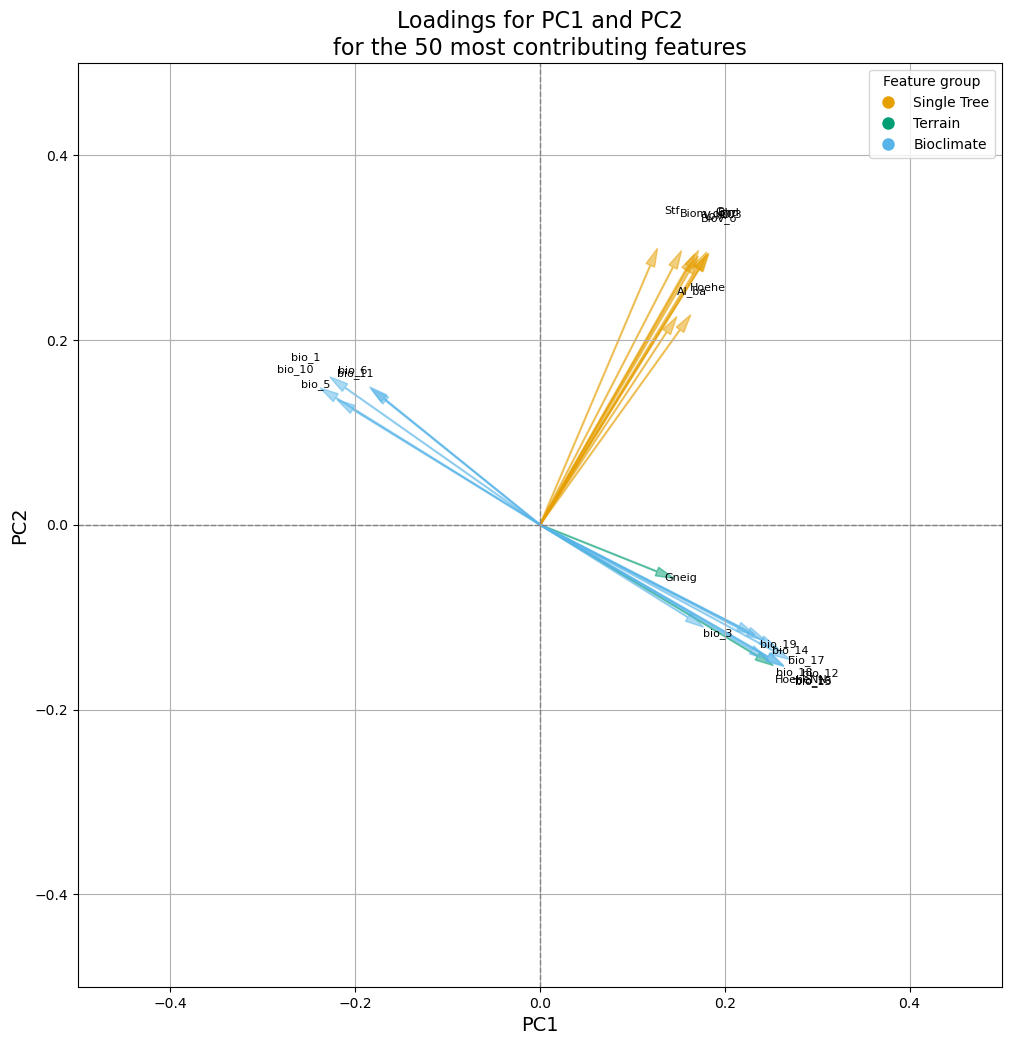

In [ ]:
# Create the biplot
plt.figure(figsize=(12, 12))  # Adjust figure size

# Plot arrows for all features
scaling_factor = 1  # Scale arrows for better visibility
for j, index in enumerate(top_50_indices):
    plt.arrow(0, 0, components[0, index] * scaling_factor, components[1, index] * scaling_factor, 
              head_width=0.01, head_length=0.02, fc=colors[j], ec=colors[j], alpha=0.5)
    plt.text(components[0, index] * 1.2, 
             components[1, index] * 1.2, 
             feature_names[index], fontsize=8, ha='center', color='black')

# Set limits and labels
plt.xlim(-0.5, .5)  # Adjust these limits based on your data
plt.ylim(-0.5, .5)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.title('Loadings for PC1 and PC2\nfor the 50 most contributing features', fontsize=16)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

# Add custom legend
legend_labels = ['Single Tree', 'Terrain', 'Bioclimate']  
legend_colors = ['#E69F00', '#009E73', '#56B4E9']  
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
plt.legend(patches, legend_labels, loc='upper right', title='Feature group')


plt.show()


## PCA Categorical features

In [209]:
cat_selector = selector(dtype_include=object)
num_selector = selector(dtype_include=np.number)

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

feature_transformer = ColumnTransformer(
    [
        ('cat', cat_transformer, cat_selector),
    ]
)

pca = PCA(n_components=2)

In [210]:
cat_pca_pipe = Pipeline(
    [
    ('preprocess', feature_transformer),
    ('pca', pca)
    ]
)

In [211]:
cat_pca_pipe.fit(features)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023DD85812E0>)])),
                ('pca', PCA(n_components=2))])

In [233]:
components_cat = cat_pca_pipe.named_steps['pca'].components_

In [226]:
feature_names = cat_pca_pipe['preprocess'].get_feature_names_out()
feature_names = np.array([name.split('__')[1] for name in feature_names])

In [231]:
feature_names.shape

(75,)

In [259]:
top_10_indices_pc1 = np.argsort(np.abs(components_cat[0]))[-10:]
top_10_indices_pc2 = np.argsort(np.abs(components_cat[1]))[-10:]
top_20_indices = np.unique(np.concatenate([top_10_indices_pc1, top_10_indices_pc2]))

In [264]:
feature_names[top_20_indices]

array(['Gform_middle sloping site', 'Gform_plain', 'Gform_sloping site',
       'natHoe_planar', 'natHoe_submontane',
       'NatNaeheHaupt_conditional seminaturel',
       'NatNaeheHaupt_conditioned by culture',
       'NatNaeheHaupt_seminaturel', 'BestockAb_single storied',
       'BestockAb_two layered (pre-regeneration)',
       'BestockAb_two-layered', 'BODTYP_B', 'BODTYP_G', 'BODTYP_S',
       'NAEHR_oligotrophic-mesotrophic', 'WASSER_G', 'WASSER_T'],
      dtype='<U68')

In [273]:
colors = [
    '#009E73',
    '#009E73',
    '#009E73',
    '#009E73',
    '#009E73',
    '#CC79A7',
    '#CC79A7',
    '#CC79A7',
    '#CC79A7',
    '#CC79A7',
    '#CC79A7',
    '#D55E00',
    '#D55E00',
    '#D55E00',
    '#D55E00',
    '#D55E00',
    '#D55E00'
]

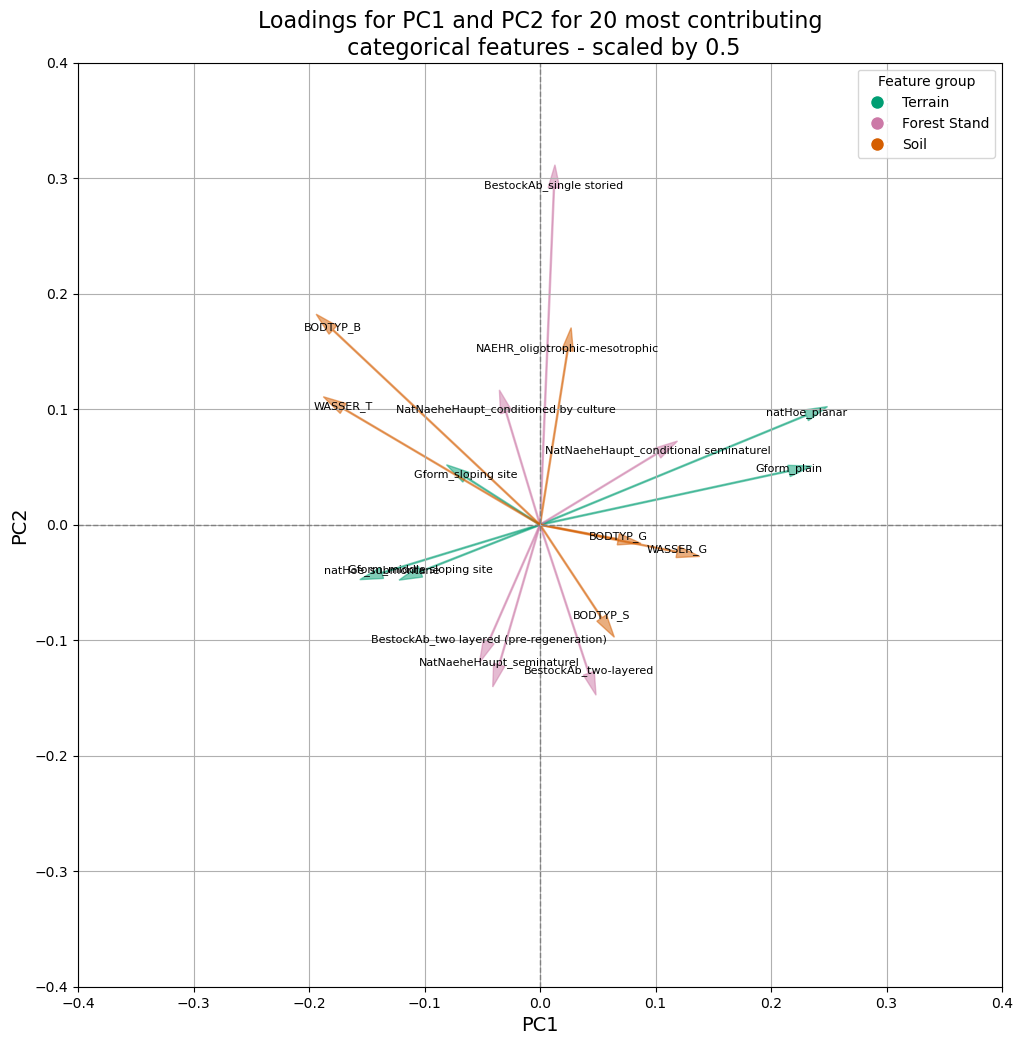

In [278]:
plt.figure(figsize=(12, 12))  

# Plot arrows for all features
scaling_factor = .5  # Scale arrows for better visibility
for i, index in enumerate(top_20_indices):
    plt.arrow(0, 0, components_cat[0, index] * scaling_factor, components_cat[1, index] * scaling_factor, 
              head_width=0.01, head_length=0.02, fc=colors[i], ec=colors[i], alpha=0.5)
    plt.text(components_cat[0, index] * .5, 
             components_cat[1, index] * .5, 
             feature_names[index], fontsize=8, ha='center', color='black')

# Set limits and labels
plt.xlim(-0.4, .4)  # Adjust these limits based on your data
plt.ylim(-0.4, .4)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.title('Loadings for PC1 and PC2 for 20 most contributing\n categorical features - scaled by 0.5', fontsize=16)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')

# Add custom legend
legend_labels = ['Terrain', 'Forest Stand', 'Soil']  
legend_colors = ['#009E73', '#CC79A7', '#D55E00']  
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
plt.legend(patches, legend_labels, loc='upper right', title='Feature group')

plt.show()